<a href="https://colab.research.google.com/github/Priyankansd/IT-496/blob/main/DuPontAnalysis_HUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
myAPIKey = '02858189cd64488754115fea6a89087b'
stock ="HUSA"
balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements= requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()

In [ ]:
print(balanceStatements[0:5])

[{'date': '2021-12-31', 'symbol': 'HUSA', 'reportedCurrency': 'USD', 'cik': '0001156041', 'fillingDate': '2022-03-31', 'acceptedDate': '2022-03-31 17:31:12', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 4894.577, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 4894.577, 'netReceivables': 214.662, 'inventory': 0.0, 'otherCurrentAssets': 85.40299999999934, 'totalCurrentAssets': 5194.642, 'propertyPlantEquipmentNet': 5080.265, 'goodwill': 0.0, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 0.0, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 458.9459999999999, 'totalNonCurrentAssets': 5539.211, 'otherAssets': 0.0, 'totalAssets': 10733.853, 'accountPayables': 69.607, 'shortTermDebt': 57.174, 'taxPayables': 0.0, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 15.175999999999988, 'totalCurrentLiabilities': 141.957, 'longTermDebt': 0.0, 'deferredRevenueNonCurrent': 0.0, 'deferredTaxLiabilitiesNonCurrent': 0.0, 'otherNonCurren

In [ ]:
fiveYearBalanceStatement= balanceStatements[0:5]
fiveYearIncomeStatement = incomeStatements[0:5]

In [ ]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
calendarYear=[]
#gettting details
for i in range (0,5):
   calendarYear.append(fiveYearIncomeStatement[i]['calendarYear'])
   profitabilityValue = fiveYearIncomeStatement[i]['netIncome']/fiveYearIncomeStatement[i]['revenue']
   profitability. append(profitabilityValue)
   assetTurnOverValue= fiveYearIncomeStatement[i]['revenue']/fiveYearBalanceStatement[i]['totalAssets']
   assetTurnOver.append(assetTurnOverValue)
   capitalStructureValue=fiveYearBalanceStatement[i]['totalAssets']/fiveYearBalanceStatement[i]['totalStockholdersEquity']
   capitalStructure.append(capitalStructureValue)
   returnOnEquityValue=profitabilityValue * assetTurnOverValue * capitalStructureValue
   returnOnEquity.append(returnOnEquityValue)
   

In [ ]:
from collections import defaultdict
dataF1 = pd.DataFrame(columns = ['calendarYear','profitability','assetTurnOver','capitalStructure','returnOnEquity'] )
dataF1['calendarYear']  = calendarYear
dataF1['profitability'] =  profitability
dataF1['assetTurnOver'] =  assetTurnOver
dataF1['capitalStructure'] = capitalStructure
dataF1['returnOnEquity']  = returnOnEquity


print(dataF1)

  calendarYear  profitability  assetTurnOver  capitalStructure  returnOnEquity
0         2021      -0.795920     123.925491          1.040915     -102.670370
1         2020      -7.308972      86.510369          0.000992       -0.626975
2         2019      -2.520756       0.141182          1.210583       -0.430829
3         2018      -0.106649       0.301256          1.018949       -0.032738
4         2017      -3.232297       0.083382          1.032300       -0.278220


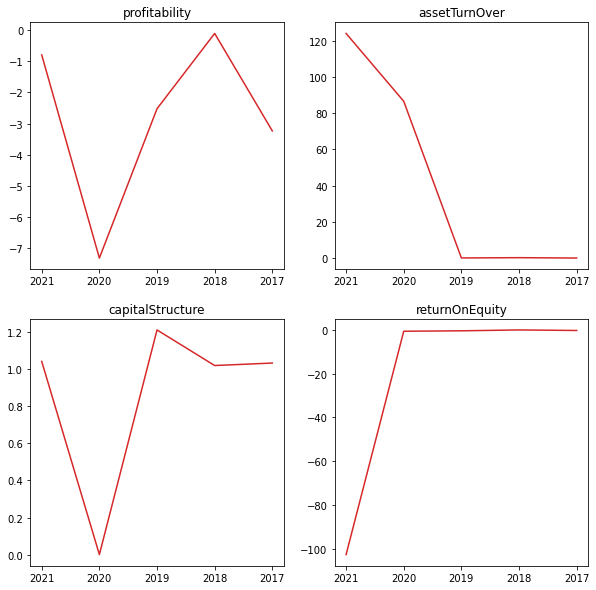

In [ ]:
from typing import ValuesView
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
x = dataF1['calendarYear']


variables= ['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']

for i in range(0,2):
    for j in range(0, 2):
      valuesView= i* 2+j
      axs[i,j].plot (x, dataF1[variables[valuesView]],'tab:red')
      axs[i,j].set_title(variables[valuesView])
     